## Personal Email Exploratory Data Analysis

Dataset taken from my mailbox via takeout.google.com

#### Extract, Transform and Loading 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    import mailbox
except ImportError:
    !pip install mailbox

In [2]:
mboxpath = "./takeout/Mail/mail.mbox"
mbox = mailbox.mbox(mboxpath)
mbox

In [3]:
# exploring mbox object

for keys in mbox[1].keys():
    print(keys)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
DKIM-Signature
Received
Subject
From
Reply-To
To
Date
Message-ID
X-Mailer
X-Campaign
X-campaignid
X-Report-Abuse
X-MC-User
Feedback-ID
List-ID
X-Accounttype
X-Original-Sender
List-Unsubscribe
List-Unsubscribe-Post
Content-Type
MIME-Version


Cleaning the data and making a csv file for dataset storage

In [4]:
# making a csv file first for analysis and storing the required data from Mbox object

import csv

with open('aayush_mbox.csv', 'w') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['Subject', 'From', 'Date', 'To','Label', 'Thread'])
    
    for message in mbox:
        writer.writerow([
            message['Subject'],
            message['From'],
            message['Date'],
            message['To'],
            message['X-Gmail-Labels'],
            message['X-GM-THRID']
            
        ])

In [5]:
df = pd.read_csv('./aayush_mbox.csv')
df.head()

,Subject,From,Date,To,Label,Thread
0,JPMorgan Chase & Co. is looking for: Data Scie...,LinkedIn <jobs-listings@linkedin.com>,"Tue, 1 Dec 2020 12:32:18 +0000 (UTC)",AAYUSH SONI <aayushsoni159@gmail.com>,"Inbox,Category social,Unread",1684879117786961830
1,=?utf-8?Q?Problem=20#45=20=5BEasy=5D?=,=?utf-8?Q?Jamal=20ERRAKIBI?= <errakibi.jamal@g...,"Tue, 1 Dec 2020 07:51:44 +0000",<aayushsoni159@gmail.com>,"Inbox,Opened,Category promotions",1684861467390709116
2,"AAYUSH D SONI, check out the jobs applied by y...",Naukri Alerts <naukrinewalerts@naukri.com>,"Tue, 1 Dec 2020 10:08:43 +0530",aayushsoni159@gmail.com,"Inbox,Category updates,Unread",1684849326132162522
3,The Role Of Leaders And Team Members in Agile ...,Nagarro <promotion@techgig.com>,28 Nov 2020 20:13:36 +0530,aayushsoni159@gmail.com,"Inbox,Category promotions,Unread",1684615698368737344
4,[Analytics Vidhya] Weekly Progress Reminder,Analytics Vidhya <noreply@notify.thinkific.com>,"Sun, 29 Nov 2020 13:24:22 +0000",aayush soni <aayushsoni159@gmail.com>,"Inbox,Category updates,Unread",1684701201748226629


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079 entries, 0 to 3078
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  3052 non-null   object
 1   From     3079 non-null   object
 2   Date     3079 non-null   object
 3   To       3068 non-null   object
 4   Label    3079 non-null   object
 5   Thread   3079 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 144.5+ KB


In [7]:
# changing date format
df.Date = df['Date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

In [8]:
# dropping Na values
df = df[df['Date'].notna()]

In [9]:
# saving cleaned CSV
df.to_csv('aayush_cleaned_mail_csv.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3070 entries, 0 to 3078
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   Subject  3043 non-null   object             
 1   From     3070 non-null   object             
 2   Date     3070 non-null   datetime64[ns, UTC]
 3   To       3059 non-null   object             
 4   Label    3070 non-null   object             
 5   Thread   3070 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 167.9+ KB


In [11]:
df.head(10)

,Subject,From,Date,To,Label,Thread
0,JPMorgan Chase & Co. is looking for: Data Scie...,LinkedIn <jobs-listings@linkedin.com>,2020-12-01 12:32:18+00:00,AAYUSH SONI <aayushsoni159@gmail.com>,"Inbox,Category social,Unread",1684879117786961830
1,=?utf-8?Q?Problem=20#45=20=5BEasy=5D?=,=?utf-8?Q?Jamal=20ERRAKIBI?= <errakibi.jamal@g...,2020-12-01 07:51:44+00:00,<aayushsoni159@gmail.com>,"Inbox,Opened,Category promotions",1684861467390709116
2,"AAYUSH D SONI, check out the jobs applied by y...",Naukri Alerts <naukrinewalerts@naukri.com>,2020-12-01 04:38:43+00:00,aayushsoni159@gmail.com,"Inbox,Category updates,Unread",1684849326132162522
3,The Role Of Leaders And Team Members in Agile ...,Nagarro <promotion@techgig.com>,2020-11-28 14:43:36+00:00,aayushsoni159@gmail.com,"Inbox,Category promotions,Unread",1684615698368737344
4,[Analytics Vidhya] Weekly Progress Reminder,Analytics Vidhya <noreply@notify.thinkific.com>,2020-11-29 13:24:22+00:00,aayush soni <aayushsoni159@gmail.com>,"Inbox,Category updates,Unread",1684701201748226629
5,You've created a Job Alert,Naukri Alerts <naukrimyalerts@naukri.com>,2020-12-01 18:49:09+00:00,aayushsoni159@gmail.com,"Inbox,Opened,Category updates",1684902826701492725
6,30+ new jobs for 'machine learning',LinkedIn Job Alerts <jobalerts-noreply@linkedi...,2020-12-01 19:18:33+00:00,AAYUSH SONI <aayushsoni159@gmail.com>,"Inbox,Category personal,Unread",1684904674994197380
7,30+ new jobs for 'machine learning',LinkedIn Job Alerts <jobalerts-noreply@linkedi...,2020-12-01 19:18:33+00:00,AAYUSH SONI <aayushsoni159@gmail.com>,"Inbox,Category updates,Unread",1684904674994197380
8,"Aayush, Boost your Profile to Recruiters","""Shine.com"" <jobs@job.shine.com>",2020-11-29 09:48:52+00:00,<aayushsoni159@gmail.com>,"Inbox,Category updates,Unread",1684688788874229066
9,"AAYUSH, thanks for being a valued member",=?UTF-8?B?TGlua2VkSW4=?= <linkedin@e.linkedin....,2020-11-24 16:43:48+00:00,aayushsoni159@gmail.com,"Inbox,Category social,Unread",1684293517405362385


#### Refactoring Data

1.) Extracting Email Addresses from "From" column using regex

In [12]:
# using regex

import re


def extract_email_ID(string):
    email = re.findall(r'<.+?>', string)
    if not email:
        email = list(filter(lambda y: '@' in y, string.split())) # checking if @ is present and splitting 
    return email[0] if email else np.nan

In [13]:
# Testing the function
test_str = 'Nagarro <promotion@techgig.com>'
print(extract_email_ID(test_str))


<promotion@techgig.com>


In [14]:
# applying to dataset

df.From = df['From'].apply(lambda x : extract_email_ID(x))

2.) Refactoring Label Column

In [15]:
myemail = 'aayushsoni159@gmail.com'
df['Label'] = df['Label'].apply(lambda x: "sent" if x==myemail else "inbox")

3.) Since it is my mailbox, Column "To" is irrelevant, thereby dropping it

In [16]:
df.drop(columns='To', inplace=True)
df.head(10)

,Subject,From,Date,Label,Thread
0,JPMorgan Chase & Co. is looking for: Data Scie...,<jobs-listings@linkedin.com>,2020-12-01 12:32:18+00:00,inbox,1684879117786961830
1,=?utf-8?Q?Problem=20#45=20=5BEasy=5D?=,<errakibi.jamal@gmail.com>,2020-12-01 07:51:44+00:00,inbox,1684861467390709116
2,"AAYUSH D SONI, check out the jobs applied by y...",<naukrinewalerts@naukri.com>,2020-12-01 04:38:43+00:00,inbox,1684849326132162522
3,The Role Of Leaders And Team Members in Agile ...,<promotion@techgig.com>,2020-11-28 14:43:36+00:00,inbox,1684615698368737344
4,[Analytics Vidhya] Weekly Progress Reminder,<noreply@notify.thinkific.com>,2020-11-29 13:24:22+00:00,inbox,1684701201748226629
5,You've created a Job Alert,<naukrimyalerts@naukri.com>,2020-12-01 18:49:09+00:00,inbox,1684902826701492725
6,30+ new jobs for 'machine learning',<jobalerts-noreply@linkedin.com>,2020-12-01 19:18:33+00:00,inbox,1684904674994197380
7,30+ new jobs for 'machine learning',<jobalerts-noreply@linkedin.com>,2020-12-01 19:18:33+00:00,inbox,1684904674994197380
8,"Aayush, Boost your Profile to Recruiters",<jobs@job.shine.com>,2020-11-29 09:48:52+00:00,inbox,1684688788874229066
9,"AAYUSH, thanks for being a valued member",<linkedin@e.linkedin.com>,2020-11-24 16:43:48+00:00,inbox,1684293517405362385


4.) Refactoring Timezones

In [17]:
import datetime
import pytz

def refactor_timezone(x):
    est = pytz.timezone('Asia/Kolkata')
    return x.astimezone(est)

In [18]:
df['Date'] = df['Date'].apply(lambda x : refactor_timezone(x))

In [19]:
# setting days

categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['Day_of_week'] = df['Date'].apply(lambda x : x.day_name())
df['Day_of_week'] = pd.Categorical(df['Day_of_week'], categories=categories, ordered=True)

In [20]:
# setting time of day

df['Time_of_day'] = df['Date'].apply(lambda x: x.hour + x.minute / 60 + x.second / 3600)

In [21]:
# refactoring hour, year integer and the year fraction

df['hour'] = df['Date'].apply(lambda x: x.hour)
df['year_int'] = df['Date'].apply(lambda x: x.year)
df['year']  = df['Date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [22]:
df.index = df['Date']
del df['Date']

In [23]:
df.head(10)

,Subject,From,Label,Thread,Day_of_week,Time_of_day,hour,year_int,year
Date,,,,,,,,,
2020-12-01 18:02:18+05:30,JPMorgan Chase & Co. is looking for: Data Scie...,<jobs-listings@linkedin.com>,inbox,1684879117786961830,Tuesday,18.038333,18,2020,2020.919918
2020-12-01 13:21:44+05:30,=?utf-8?Q?Problem=20#45=20=5BEasy=5D?=,<errakibi.jamal@gmail.com>,inbox,1684861467390709116,Tuesday,13.362222,13,2020,2020.919918
2020-12-01 10:08:43+05:30,"AAYUSH D SONI, check out the jobs applied by y...",<naukrinewalerts@naukri.com>,inbox,1684849326132162522,Tuesday,10.145278,10,2020,2020.919918
2020-11-28 20:13:36+05:30,The Role Of Leaders And Team Members in Agile ...,<promotion@techgig.com>,inbox,1684615698368737344,Saturday,20.226667,20,2020,2020.911704
2020-11-29 18:54:22+05:30,[Analytics Vidhya] Weekly Progress Reminder,<noreply@notify.thinkific.com>,inbox,1684701201748226629,Sunday,18.906111,18,2020,2020.914442
2020-12-02 00:19:09+05:30,You've created a Job Alert,<naukrimyalerts@naukri.com>,inbox,1684902826701492725,Wednesday,0.319167,0,2020,2020.922656
2020-12-02 00:48:33+05:30,30+ new jobs for 'machine learning',<jobalerts-noreply@linkedin.com>,inbox,1684904674994197380,Wednesday,0.809167,0,2020,2020.922656
2020-12-02 00:48:33+05:30,30+ new jobs for 'machine learning',<jobalerts-noreply@linkedin.com>,inbox,1684904674994197380,Wednesday,0.809167,0,2020,2020.922656
2020-11-29 15:18:52+05:30,"Aayush, Boost your Profile to Recruiters",<jobs@job.shine.com>,inbox,1684688788874229066,Sunday,15.314444,15,2020,2020.914442


### Data Analysis

####  ```Number of emails ```

In [24]:
print(df.index.min() .strftime('%a, %d %b %Y %I:%M %p'))
print(df.index.max() .strftime('%a, %d %b %Y %I:%M %p'))

print(df['Label'].value_counts())

Mon, 11 Aug 2014 03:26 PM
Thu, 03 Dec 2020 12:07 AM
inbox    3070
Name: Label, dtype: int64


####  ```Activity during day```

In [25]:
sent = df[df['Label'] == 'sent']
recieved = df[df['Label'] == 'inbox']

In [26]:
# plotting result

from matplotlib.ticker import MaxNLocator
from scipy import ndimage
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatch

def plot_mail_spec(df, ax, color="C3", s=0.9, title=''):
    inde = np.zeros(len(df), dtype='bool')
    est = pytz.timezone('Asia/Kolkata')
    
    df[~inde].plot.scatter('year', 'Time_of_day', s=s, alpha=0.6, ax=ax,
                          color=color)
    ax.set_ylim(0, 24)
    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), 
                                                   "%H").strftime("%I %p") for ts in ax.get_yticks()]);
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title);
    ax.grid(ls=':', color='k')
    
    return ax

<ipython-input-26-82c189795e7c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))),


<AxesSubplot:title={'center':'INBOX'}>

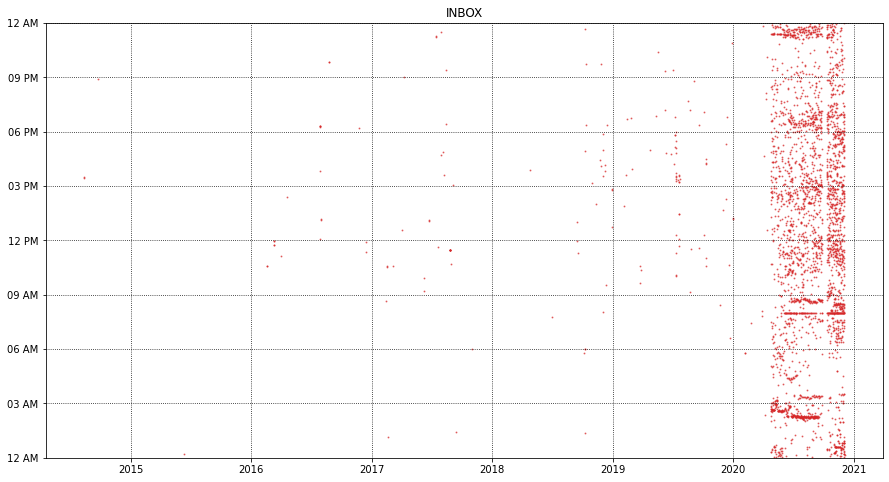

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
plot_mail_spec(recieved, ax, title="INBOX")

In [28]:
#max mails are recieved in 2020 and 2021
# Max mails are recieved at 3AM to 6PM respectively

####  ```Average Emails Per Day```

In [29]:
def plot_number_of_emails_per_day_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')
    
def plot_number_of_emails_per_hours_per_year(df, ax, label=None, dt=1, smooth=False,
                                            weight_fun=None, **plot_kwargs):
    tod = df[df['Time_of_day'].notna()]['Time_of_day'].values
    year = df[df['year'].notna()]['year'].values
    T =  tod.max() - tod.min()
    Ty = year.max() - year.min()
    bins = int(T / dt)
    
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 /dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5 *(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, label=label, weights=weights, **plot_kwargs);
        
        
    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0,24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xtickslabels([datetime.datetime.strptime(str(int(np.mod(
        ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);

In [30]:
# creating a class that plots the time of day verses year for all emails 

class TriplePlot:
    def __init__(self):
        gs = gridspec.GridSpec(6,6)
        self.ax1 = plt.subplot(gs[2:6, :4])
        self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
        plt.setp(self.ax2.get_yticklabels(), visible=False);
        self.ax3 = plt.subplot(gs[:2, :4])
        plt.setp(self.ax3.get_xticklabels(), visible=False);
        
    def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, 
            yr_bin=0.1, hr_bin=0.5):
        plot_mail_spec(df, self.ax1, color=color, s=markersize)
        plot_number_of_emails_per_hours_per_year(df, self.ax2, dt=hr_bin, color=color, 
                                                alpha=alpha, orientation='horizontal')
        self.ax2.set_xlabel('Average Emails per hour.')
        plot_number_of_emails_per_day_per_year(df, self.ax3, dt=yr_bin, color=color, 
                                              alpha=alpha)
        self.ax3.set_ylabel("Average Emails per day")

#### ``` Plotting Avg Emails per day vs avg emails per year```

<ipython-input-26-82c189795e7c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))),


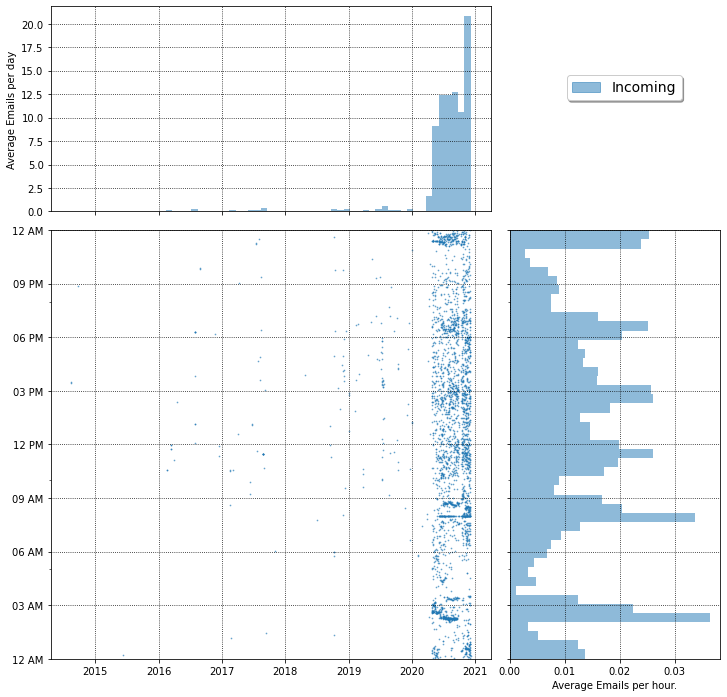

In [31]:
plt.figure(figsize=(12,12))
tpl = TriplePlot()
tpl.plot(recieved, color='C0', alpha=0.5)
p1 = mpatch.Patch(color='C0', label='Incoming', alpha=0.5)
plt.legend(handles=[p1], bbox_to_anchor=[1.45, 0.7], fontsize=14, shadow=True);

#### The average emails per hour and per year is shown by the plot above. In my case major email communication happenend in the year 2020

####  ```Number of Emails Per day```

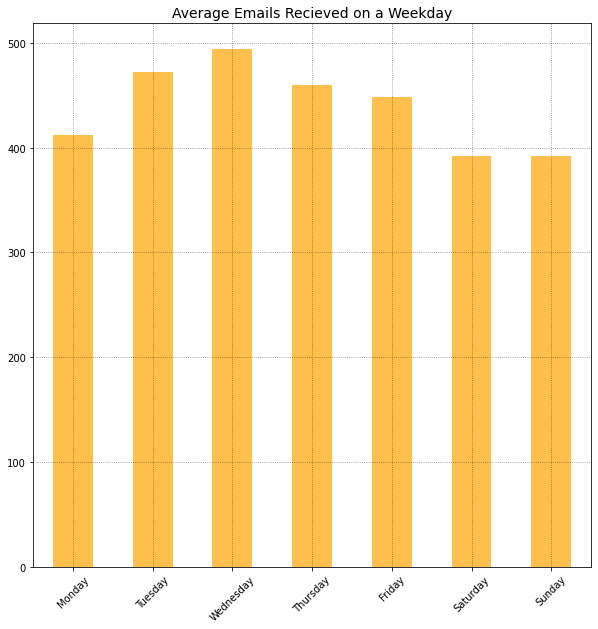

In [32]:
# plotting graph to find most emails recieved on a weekday
counts = df.Day_of_week.value_counts(sort=False)
counts.plot(kind='bar', color='orange', alpha=0.7, rot=45,figsize=(10,10));
plt.grid(ls=':', color='k', alpha=0.5)
plt.title('Average Emails Recieved on a Weekday', fontsize=14)
plt.show();

####  From the above graph I can conclude that my mailbox is busiest on Wednesday and Tuesday

###  ```Most Frequently Used Words```

In [33]:
try :
    from wordcloud import WordCloud
except ImportError:
    print('wordcloud is not installed, try pip3 install wordcloud on terminal')

In [35]:
text = ' '.join(map(str, recieved['Subject'].values))

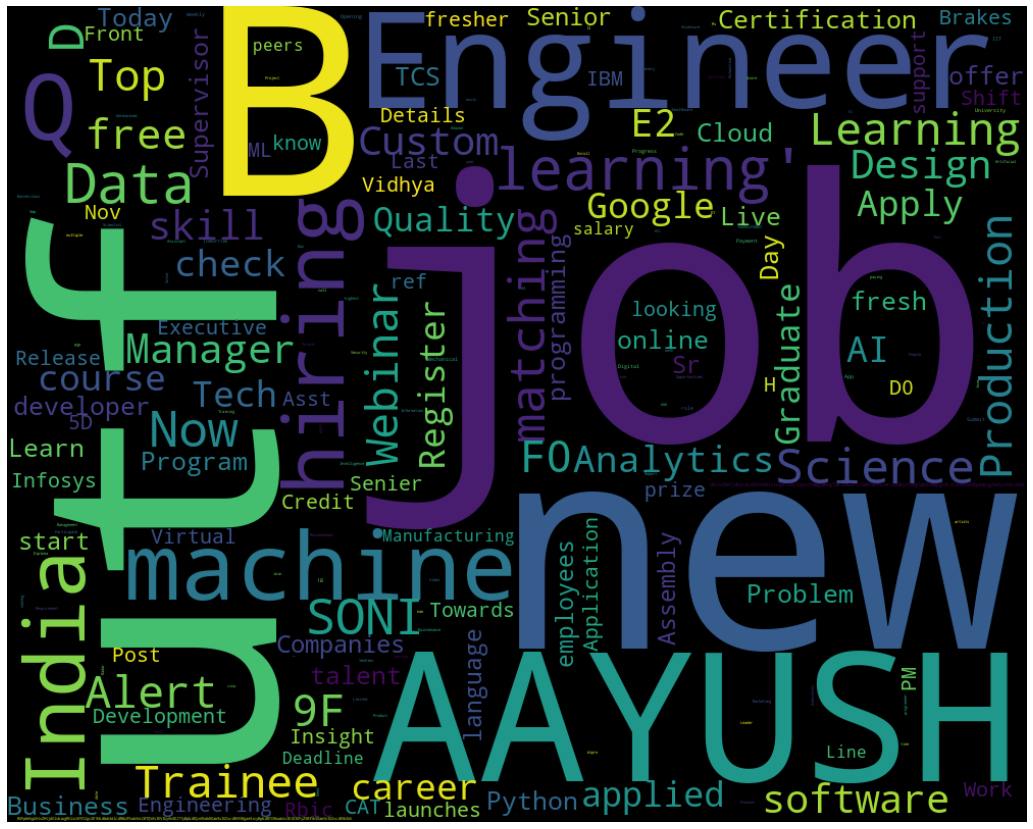

In [37]:
# Plotting the word cloud

stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=1000, height=800, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis(False)
plt.margins(x=0,y=0)
